# Analysis of Titanic Data 
https://www.kaggle.com/c/titanic/data

In [1]:
%ls -lrt DataScience/

total 96
-rw-r--r-- 1 anitogi anitogi 61194 Apr  4 22:46 train.csv
-rw-r--r-- 1 anitogi anitogi 28629 Apr  4 22:47 test.csv
-rw-r--r-- 1 anitogi anitogi  3258 Apr  4 22:47 gender_submission.csv


In [2]:
import pandas as pd
titanic_data = pd.read_csv( 'DataScience/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


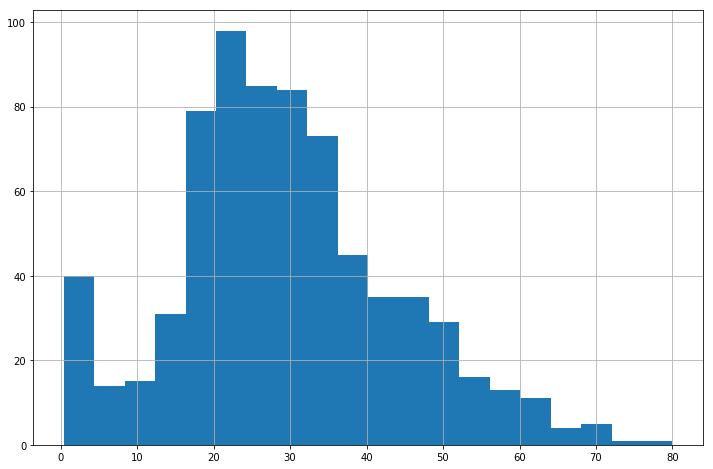

In [3]:
import matplotlib.pyplot as plt
age_list = titanic_data[ 'Age' ]
age_list[~age_list.isnull()]
type( age_list )
LARGE_FIGSIZE = (12, 8)
age_list.hist( bins = 20, figsize=LARGE_FIGSIZE )
plt.show()
#plt.hist( age_list_wo_na, bins=10 )

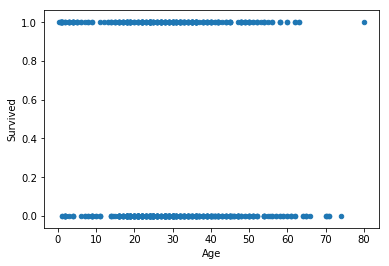

In [4]:
age_list = titanic_data[ 'Age' ]
s_list = titanic_data[ 'Survived' ]
ticket = titanic_data[ 'Cabin' ]

BabyDataSet = list( zip ( age_list, s_list, ticket ) )
df = pd.DataFrame(data = BabyDataSet, columns=['Age', 'Survived', 'Cabin'])
df.dtypes

df.plot.scatter('Age', 'Survived')
#df.plot.scatter('Cabin', 'Survived')
plt.show()
#df.plot?

## Understanding the titanic Data

- Eventually a person can only live or die ( boolean answer )
- All the possibilities of the data are the charecteristic of data.
- Our first model should focus on the following columns
    - class ( should be made enum )
    - Age ( int can be mapped directly )
    - Cabin ( should be made enum )
    
### for this example let us think that the living possibility on depends on the Age of the passenger
$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response, wheather the person lives or dies
- $x$ is the feature, age of the passenger
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

In [5]:
type( age_list )
type( titanic_data )
ageVsSur = pd.DataFrame( { 'Survived': titanic_data['Survived'], 'Age': titanic_data['Age']} )
ageVsSur.dtypes

Age         float64
Survived      int64
dtype: object

In [6]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Survived ~ Age', data=ageVsSur).fit()

# print the coefficients
lm.params

Intercept    0.483753
Age         -0.002613
dtype: float64

we have the model ready now, we can now see how much percent of it is okay

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame( {'Age': [50.0]} )
X_new.head()
#lm.predict( X_new )

,Age
0,50.0


In [8]:
cabinVsSur = pd.DataFrame( { 'Survived': titanic_data['Survived'], 'Pclass': titanic_data['Pclass']} )
cabinVsSur.dtypes

Pclass      int64
Survived    int64
dtype: object

In [9]:
survivedCabin = cabinVsSur.where( cabinVsSur['Survived'] == 1 )
deadCabin = cabinVsSur.where( cabinVsSur['Survived'] == 0 )

sdf = survivedCabin.groupby( 'Pclass' ).count()
ddf = deadCabin.groupby( 'Pclass').count()
sdf

,Survived
Pclass,
1.0,136
2.0,87
3.0,119


In [10]:
ddf

,Survived
Pclass,
1.0,80
2.0,97
3.0,372


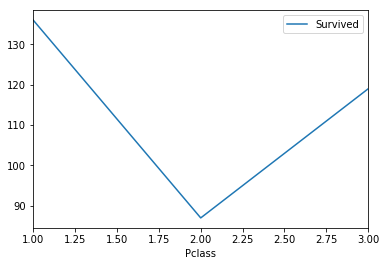

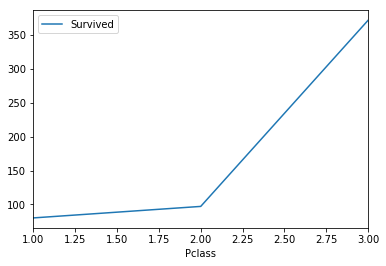

In [11]:
sdf.plot()
ddf.plot()
plt.show()

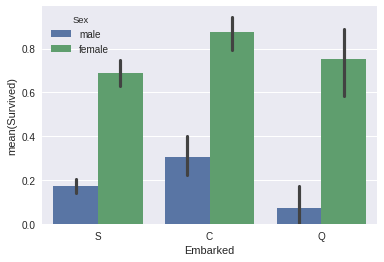

In [18]:
import seaborn as sns
%matplotlib inline
LARGE_FIGSIZE = (12, 8)
#C = Cherbourg, Q = Queenstown, S = Southampton
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_data )

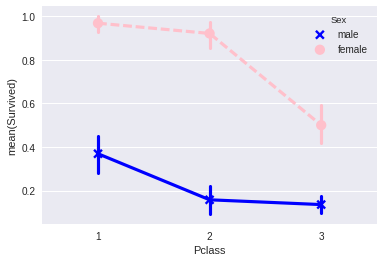

In [30]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data,
             palette={"male": "blue", "female": "pink"},
              markers=["x", "o"], linestyles=["-", "--"]);

In [31]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64